## Tutorial 10 Question 6

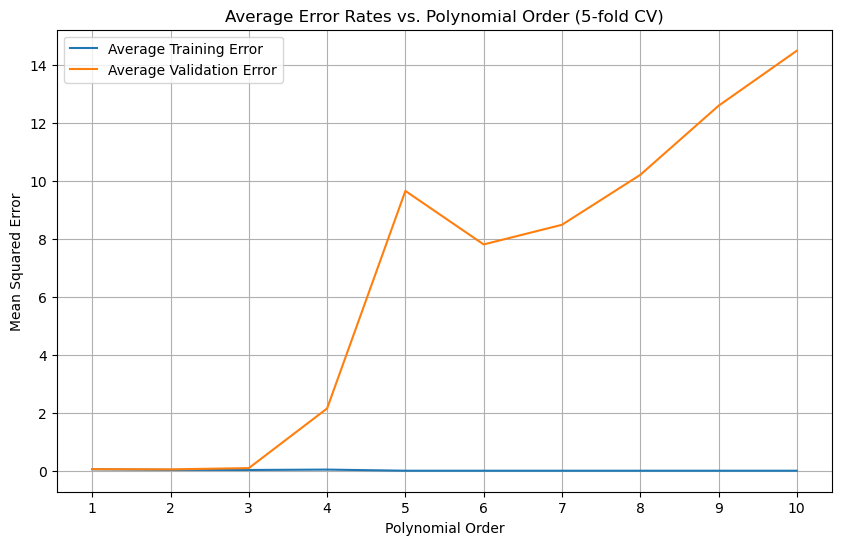

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # Validation set is 20% of train_val set

# Define polynomial orders to test
poly_orders = np.arange(1, 11)

# Initialize lists to store training and validation error rates
train_errors = []
val_errors = []

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for poly_order in poly_orders:
    train_fold_errors = []
    val_fold_errors = []
    for train_index, val_index in kf.split(X_train_val):
        X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
        y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=poly_order)
        X_train_poly = poly_features.fit_transform(X_train_fold)
        X_val_poly = poly_features.transform(X_val_fold)

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train_fold)

        # Calculate training and validation errors
        train_pred = model.predict(X_train_poly)
        val_pred = model.predict(X_val_poly)
        train_err = mean_squared_error(y_train_fold, train_pred)
        val_err = mean_squared_error(y_val_fold, val_pred)

        train_fold_errors.append(train_err)
        val_fold_errors.append(val_err)

    # Calculate average errors for this polynomial order
    train_errors.append(np.mean(train_fold_errors))  # Use np.mean() instead of directly appending 0
    val_errors.append(np.mean(val_fold_errors))

# Plot average error rates over polynomial orders
plt.figure(figsize=(10, 6))
plt.plot(poly_orders, train_errors, label='Average Training Error')
plt.plot(poly_orders, val_errors, label='Average Validation Error')
plt.xlabel('Polynomial Order')
plt.ylabel('Mean Squared Error')
plt.title('Average Error Rates vs. Polynomial Order (5-fold CV)')
plt.legend()
plt.grid(True)
plt.xticks(poly_orders)
plt.show()
